In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output

from conditional_density_estimation import *
from markov_chain_monte_carlo import * 
from utils import *
from targets import * 

In [25]:
d = 1
sigma_theta =torch.eye(d)
mu_theta =3*torch.ones(d)
prior = torch.distributions.MultivariateNormal(mu_theta, sigma_theta) 

n_D = 5000
multiplicity = 1
D_theta = prior.sample([n_D])


n_obs = 100
theta0 = torch.tensor([1.]).unsqueeze(-1)
x0 = target.sample(theta0.repeat(multiplicity,1), weights = torch.tensor([1,0])).reshape(1, multiplicity*2)

In [26]:
target = DeformedCircles()
D_x = target.sample(D_theta.repeat(multiplicity,1)).reshape(n_D, multiplicity*2)
print(D_x.shape)

torch.Size([5000, 2])


In [27]:
dif = ConditionalDIF(D_x, D_theta,10,[32,32])
dif.train(500,1000, lr = 5e-3, verbose = True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:52<00:00,  4.45it/s, loss = 4.277724 ; device: cpu]


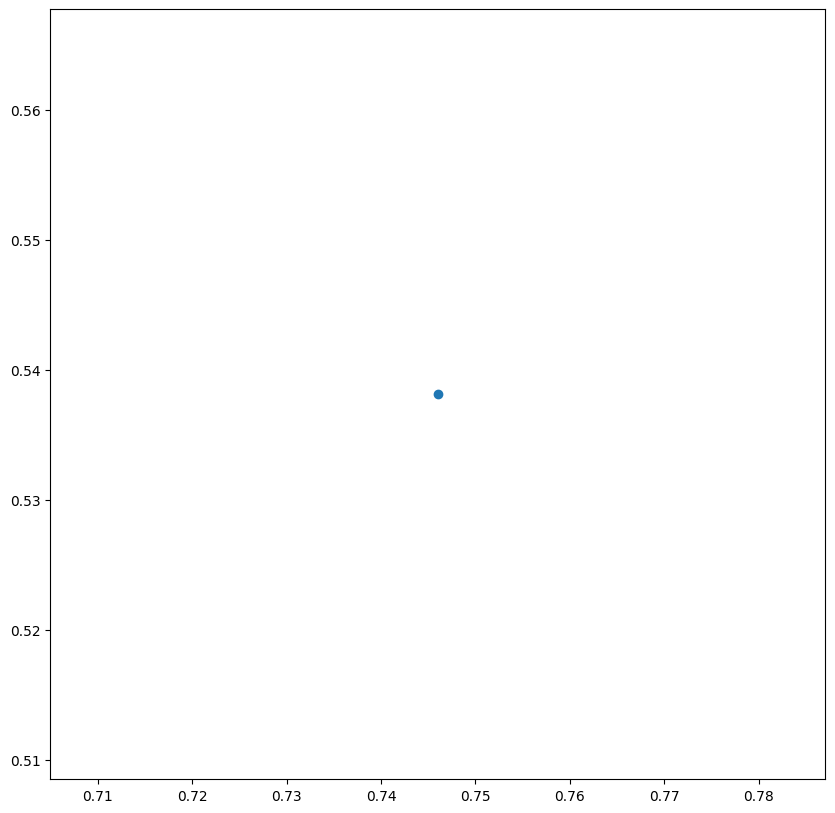

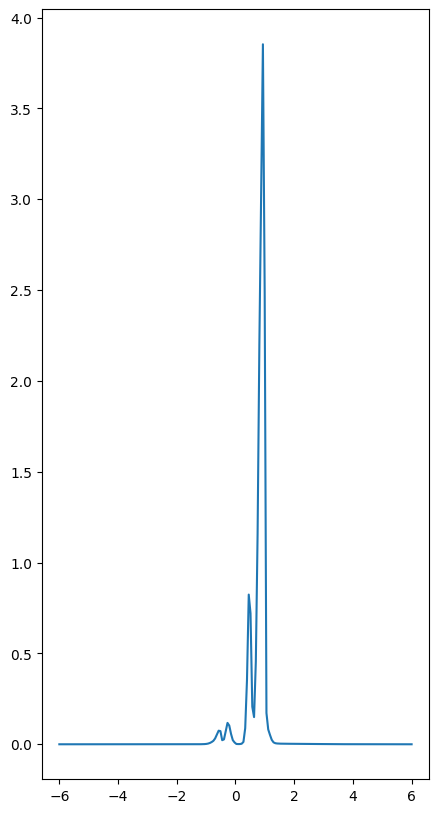

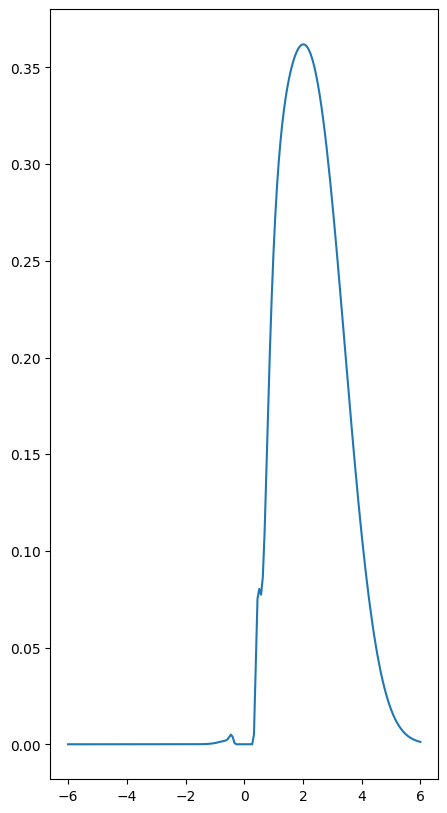

In [28]:
theta0 = torch.tensor([1.]).unsqueeze(-1)
x0 = target.sample(theta0.repeat(multiplicity,1), weights = torch.tensor([1,0])).reshape(1, multiplicity*2)
plot_2d_points(x0.reshape(multiplicity,2))
plt.show()
dif_posterior = lambda samples: prior.log_prob(samples.unsqueeze(-1)) + torch.sum(dif.log_prob(x0.unsqueeze(0).repeat(samples.shape[0],1,1), samples.unsqueeze(-1).unsqueeze(-1)), dim =1)
plot_1d_unormalized_function(lambda samples: torch.exp(dif_posterior(samples)),range=[-6,6],bins=200)
true_posterior = lambda samples: prior.log_prob(samples.unsqueeze(-1)) + torch.sum(target.log_prob(x0.reshape(1,multiplicity,2).repeat(samples.shape[0],1,1), samples.unsqueeze(-1).unsqueeze(-1).repeat(1, multiplicity, 1)), dim =1)
plot_1d_unormalized_function(lambda samples: torch.exp(true_posterior(samples)),range=[-6,6],bins=200)

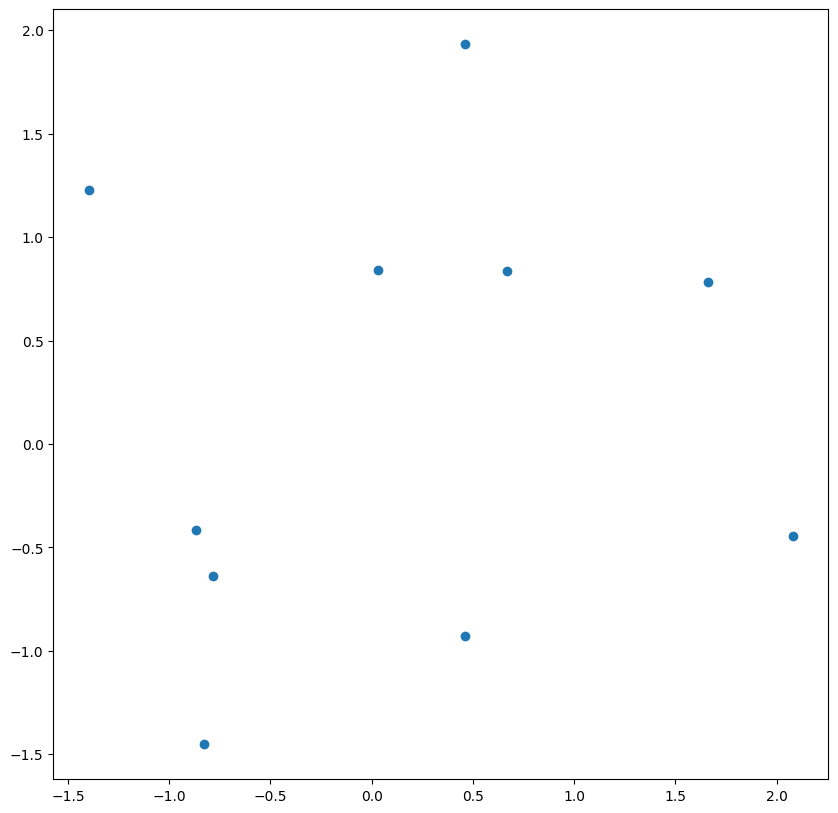

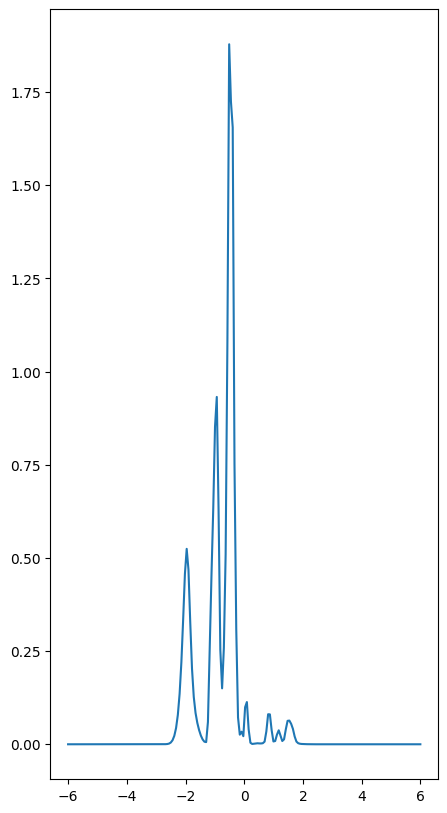

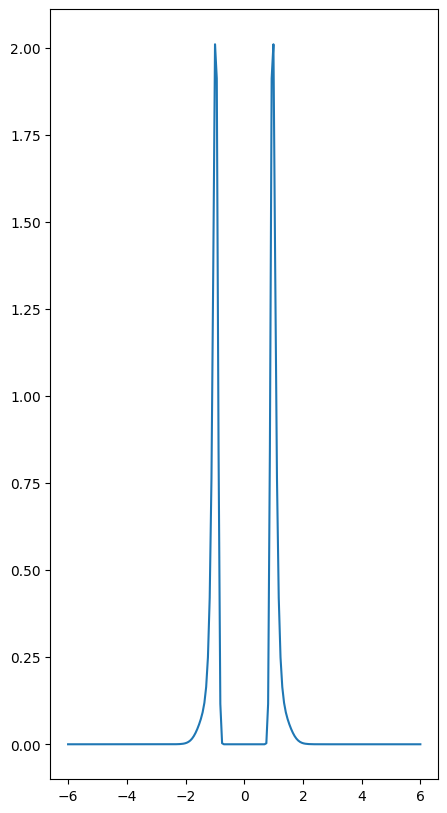

In [20]:
theta0 = torch.tensor([1.]).unsqueeze(-1)
x0 = target.sample(theta0.repeat(multiplicity,1)).reshape(1, multiplicity*2)
plot_2d_points(x0.reshape(multiplicity,2))
plt.show()
dif_posterior = lambda samples: prior.log_prob(samples.unsqueeze(-1)) + torch.sum(dif.log_prob(x0.unsqueeze(0).repeat(samples.shape[0],1,1), samples.unsqueeze(-1).unsqueeze(-1)), dim =1)
plot_1d_unormalized_function(lambda samples: torch.exp(dif_posterior(samples)),range=[-6,6],bins=200)
true_posterior = lambda samples: prior.log_prob(samples.unsqueeze(-1)) + torch.sum(target.log_prob(x0.reshape(1,multiplicity,2).repeat(samples.shape[0],1,1), samples.unsqueeze(-1).unsqueeze(-1).repeat(1, multiplicity, 1)), dim =1)
plot_1d_unormalized_function(lambda samples: torch.exp(true_posterior(samples)),range=[-6,6],bins=200)